In [10]:
# Load the dataset
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\nithi\Desktop\final project\data\data.csv")  # Replace with the actual dataset path
df = df.sample(n=5000,random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


In [11]:
#feature Scaling
# Select relevant numerical features for clustering
from sklearn.preprocessing import StandardScaler

numerical_features = [
    "valence", "danceability", "energy", "tempo", 
    "acousticness", "liveness", "speechiness", "instrumentalness"
]

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

df_scaled

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,1.473178,2.032267,0.142150,0.310507,-0.005840,-0.783298,-0.107375,1.916073
1,0.226049,0.276101,-0.771789,-0.886487,1.126217,-0.446557,-0.133457,-0.171477
2,0.470135,1.941333,0.138480,-0.865614,-0.908852,-0.194001,1.737477,-0.536877
3,-1.249911,-0.417272,-0.716732,2.266056,1.144646,-0.536354,-0.387900,2.122604
4,-0.387981,0.634154,-1.404939,-1.477663,1.297342,-0.536354,0.010283,2.151200
...,...,...,...,...,...,...,...,...
4995,0.336651,-0.019435,0.810170,0.374302,-0.837769,-0.598090,-0.353124,-0.536877
4996,1.507503,1.009258,1.357065,-0.824128,-1.106567,0.434583,-0.270821,-0.536877
4997,-0.681647,-1.826752,-0.599278,-2.003804,0.999848,0.114678,-0.387900,-0.536835
4998,-0.906665,-0.815109,-1.495966,-0.516212,1.284178,-0.592478,-0.412243,-0.287769


In [12]:
# display metadata about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           5000 non-null   float64
 1   year              5000 non-null   int64  
 2   acousticness      5000 non-null   float64
 3   artists           5000 non-null   object 
 4   danceability      5000 non-null   float64
 5   duration_ms       5000 non-null   int64  
 6   energy            5000 non-null   float64
 7   explicit          5000 non-null   int64  
 8   id                5000 non-null   object 
 9   instrumentalness  5000 non-null   float64
 10  key               5000 non-null   int64  
 11  liveness          5000 non-null   float64
 12  loudness          5000 non-null   float64
 13  mode              5000 non-null   int64  
 14  name              5000 non-null   object 
 15  popularity        5000 non-null   int64  
 16  release_date      5000 non-null   object 


In [7]:
#train Test Split
# Optional: Split for testing or validation
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)

C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nit

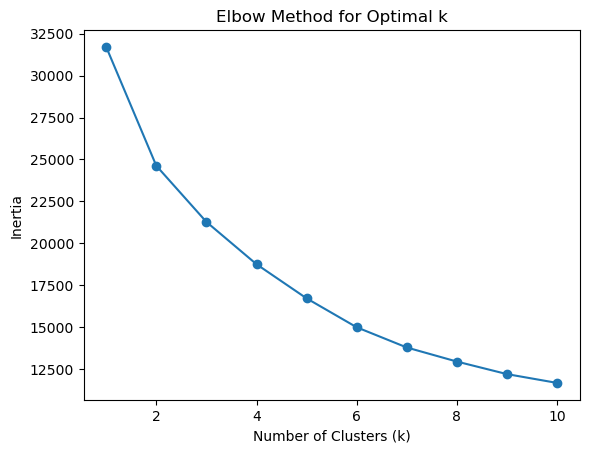

In [8]:
#ELBOW METHOD PLOT
#to find optimal K

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
#Applying KMEANS
# Apply K-Means clustering with optimal k (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
df['Cluster'].value_counts()

Cluster
2    1554
1    1309
3    1187
4     741
0     209
Name: count, dtype: int64

C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


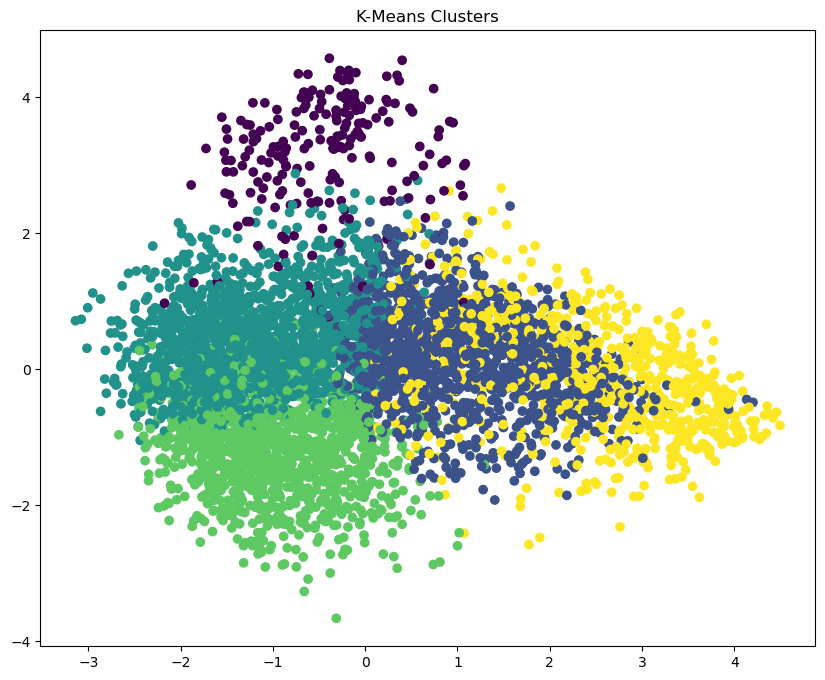

In [19]:
# Apply K-Means clustering with optimal k (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


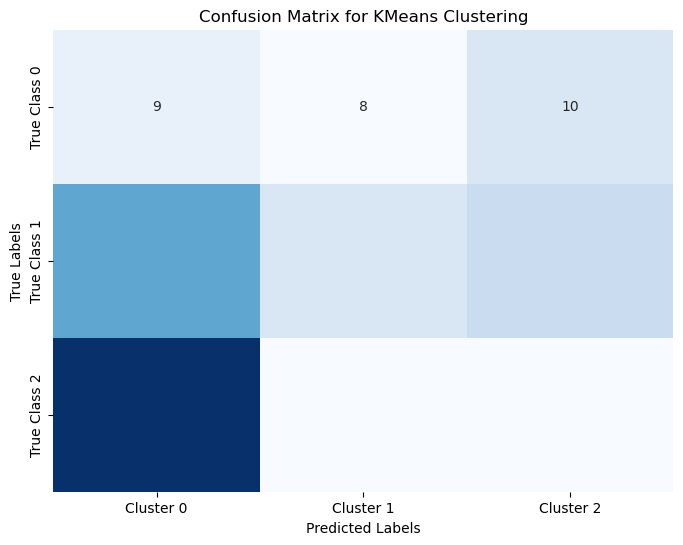

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Example data: Let's say you're working with some user-item rating data
# Replace this with your actual recommendation system dataset
df = np.random.rand(100, 5)  # Random data, 100 samples, 5 features (e.g., 5 items)
true_labels = np.random.choice([0, 1, 2], size=100)  # True labels (for evaluation, e.g., 3 categories)

# Step 1: Fit the KMeans algorithm (let's assume 3 clusters for the recommendation system)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Step 2: Get the predicted clusters
predicted_labels = kmeans.predict(df)

# Step 3: Map predicted clusters to the ground truth (optional step, if you have some mapping)
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Step 4: Generate the confusion matrix
cm = confusion_matrix(true_labels_encoded, predicted_labels)

# Step 5: Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['True Class 0', 'True Class 1', 'True Class 2'], cbar=False)

plt.title('Confusion Matrix for KMeans Clustering')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [3]:
#KMEANS ALGORITHM
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix

# Example data: Replace with your actual recommendation system dataset
data = np.random.rand(100, 5)  # Random data, 100 samples, 5 features (e.g., 5 items)
true_labels = np.random.choice([0, 1, 2], size=100)  # True labels (for evaluation, e.g., 3 categories)

# Step 1: Fit the KMeans algorithm (assuming 3 clusters for the recommendation system)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Step 2: Get the predicted clusters
predicted_labels = kmeans.predict(data)

# Step 3: Encode true labels to numeric values if not already done
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Step 4: Map predicted clusters to true labels (majority voting)
def majority_vote(cluster_labels, true_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        cluster_mask = cluster_labels == cluster
        cluster_true_labels = true_labels[cluster_mask]
        # Find the most common true label for each cluster
        most_common_label = np.bincount(cluster_true_labels).argmax()
        mapping[cluster] = most_common_label
    return mapping

# Mapping clusters to the majority true label for each cluster
cluster_to_true_label = majority_vote(predicted_labels, true_labels_encoded)

# Assign the predicted label with the most common true label for each cluster
mapped_predictions = np.array([cluster_to_true_label[cluster] for cluster in predicted_labels])

# Step 5: Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(true_labels_encoded, mapped_predictions)
precision = precision_score(true_labels_encoded, mapped_predictions, average='weighted')
recall = recall_score(true_labels_encoded, mapped_predictions, average='weighted')
f1 = f1_score(true_labels_encoded, mapped_predictions, average='weighted')

# Print Accuracy, Precision, Recall, and F1-Score
print(f"Accuracy: {accuracy}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")
print(f"F1-Score (Weighted): {f1}")

# Step 6: Calculate ROC AUC Score (Note: ROC AUC is generally used for binary/multi-class classification)
# For multi-class, we calculate the ROC AUC score using a one-vs-rest scheme
true_labels_bin = label_binarize(true_labels_encoded, classes=[0, 1, 2])  # Adjust the classes if needed
roc_auc = roc_auc_score(true_labels_bin, kmeans.transform(data), multi_class='ovr')

# Print ROC AUC Score
print(f"ROC AUC Score: {roc_auc}")

C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy: 0.47
Precision (Weighted): 0.3406030855539972
Recall (Weighted): 0.47
F1-Score (Weighted): 0.38822222222222225
ROC AUC Score: 0.5351350502020069


C:\Users\nithi\anaconda3\anacondaaa\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#recommendation system with kmeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations=5):
    # Get the cluster of the input song
    song_cluster = df[df["name"] == song_name]["Cluster"].values[0]

    # Filter songs from the same cluster
    same_cluster_songs = df[df["Cluster"] == song_cluster]

    # Calculate similarity within the cluster
    song_index = same_cluster_songs[same_cluster_songs["name"] == song_name].index[0]
    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get top recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommendations = same_cluster_songs.iloc[similar_songs][["name", "year", "artists"]]

    return recommendations

In [21]:
# Example usage
input_song =  "Camby Bolongo"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

Songs similar to 'Camby Bolongo':


,name,year,artists
3444,Bitch to the Boys,1982,['Shakatak']
3027,Chella llà - Instrument and base Version,1942,['Orchestra Studio 7']
4899,Danse Fambeaux,1968,['Dr. John']
3124,"Aragon - From The ""Coffy"" Soundtrack",1973,['Roy Ayers']
647,Into Black,2011,['Blouse']


In [24]:
# Example usage
input_song = "Just One of Those Things"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

Songs similar to 'Just One of Those Things':


,name,year,artists
4894,"Here's Lookin At You, Kid",2009,['The Gaslight Anthem']
242,God Bless The U.S.A.,1992,['Lee Greenwood']
2544,Cold Fame,2009,['Band Of Skulls']
1026,(For You) I'd Chase a Rainbow,1978,['kalapana']
1535,A Day In The Life - Remastered 2010,1973,['The Beatles']


In [23]:
# save df
df.to_csv("clustered_df.csv")